# Rossmann Store Sales Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

<Figure size 1200x600 with 0 Axes>

## Importing the dataset

---
We will load the dataset from Kaggle website and use with api of the Kaggle.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahdimashayekhi","key":"31bfb6931aeb8be585b20ead6fbdbe2e"}'}

In [3]:
# Install Kaggle api and make directory for it!
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Making the directory for dataset
!mkdir dataset
%cd dataset

/content/dataset


In [5]:
# Searching for dataset in Kaggle website
!kaggle datasets list -s rossmann-store-sales

ref                                    title                   size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------  ----------------------  ----  -------------------  -------------  ---------  ---------------  
pratyushakar/rossmann-store-sales      Rossmann Store Sales     7MB  2019-01-24 22:13:27           5379         51  0.5294118        
realvinay/rossmann-store-sales         rossmann-store-sales     7MB  2021-07-18 18:30:26             80          2  0.29411766       
calmon/rossmann-store-sales            Rossmann Store Sales     7MB  2020-05-30 23:24:39            122          2  0.23529412       
priyankamistry/rossmann-store-sales    Rossmann Store Sales     7MB  2021-06-22 05:26:45             21          1  0.23529412       
krishanusaha5720/rossmann-stores-data  Rossmann Stores Data     7MB  2023-02-14 15:46:34             52          3  0.4117647        
dm8typrogrammer/store-sale             store-sale             

In [6]:
# Downloading the dataset
!kaggle competitions download -c rossmann-store-sales
%cd ..

 72% 5.00M/6.99M [00:00<00:00, 47.9MB/s]
100% 6.99M/6.99M [00:00<00:00, 61.4MB/s]
/content


In [7]:
# Unzipping downloaded files and removing unusable files
!unzip dataset/rossmann-store-sales.zip -d dataset
!rm dataset/rossmann-store-sales.zip
!rm dataset/sample_submission.csv

Archive:  dataset/rossmann-store-sales.zip
  inflating: dataset/sample_submission.csv  
  inflating: dataset/store.csv       
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


## Exploratory Data Analysis (EDA)

In [8]:
data = pd.read_csv('dataset/train.csv')

<ipython-input-8-c51c9447396d>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset/train.csv')


In [9]:
data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
print("There are {} missing values in the data.".format(data.isna().sum()))

There are Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 missing values in the data.


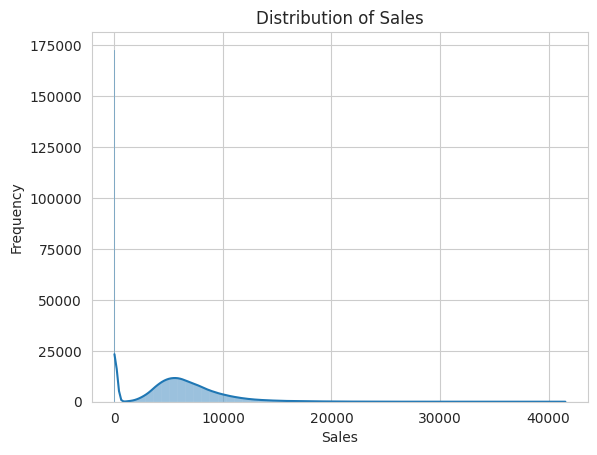

In [12]:
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

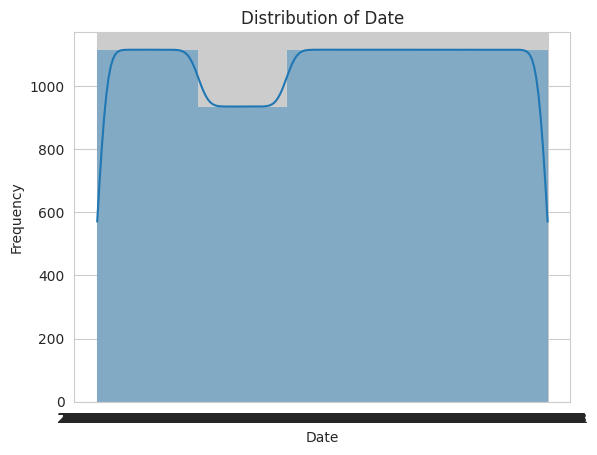

In [13]:
sns.histplot(data['Date'], bins=30, kde=True)
plt.title('Distribution of Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

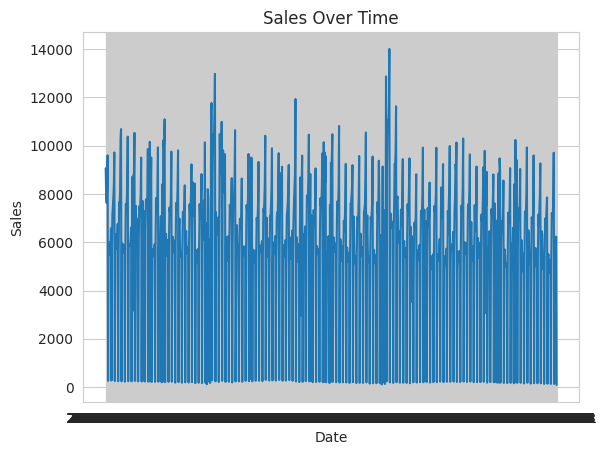

In [14]:
sns.lineplot(x='Date', y='Sales', data=data, estimator='mean', errorbar=None)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Preprocessing

In [17]:
data['Date'] = pd.to_datetime(data['Date'])
data['StateHoliday'] = pd.to_numeric(data['StateHoliday'], errors='coerce')
print(data['Date'].dtype)
print(data['StateHoliday'].dtype)

datetime64[ns]
float64


In [18]:
data.dropna(subset=['StateHoliday'], inplace=True)

In [19]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [20]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0.0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0.0,1,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0.0,1,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0.0,1,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0.0,1,31,7,2015


In [21]:
required_columns = ['Store', 'Date', 'Year']

try:
    data = data.drop(required_columns, axis=1)
except KeyError:
    pass

In [22]:
data.tail()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month
1016090,3,5097,505,1,0,0.0,1,2,1
1016091,3,10797,892,1,0,0.0,1,2,1
1016092,3,6218,753,1,0,0.0,1,2,1
1016093,3,20642,3401,1,0,0.0,1,2,1
1016094,3,3697,305,1,0,0.0,1,2,1


In [23]:
X = data.drop(columns=['Sales'])
X_numeric = data.select_dtypes(include=[np.number])
y = data['Sales']

In [24]:
print("Shape of X variable is: {}".format(X.shape))
print("Shape of Y variable is: {}".format(y.shape))

Shape of X variable is: (986159, 8)
Shape of Y variable is: (986159,)


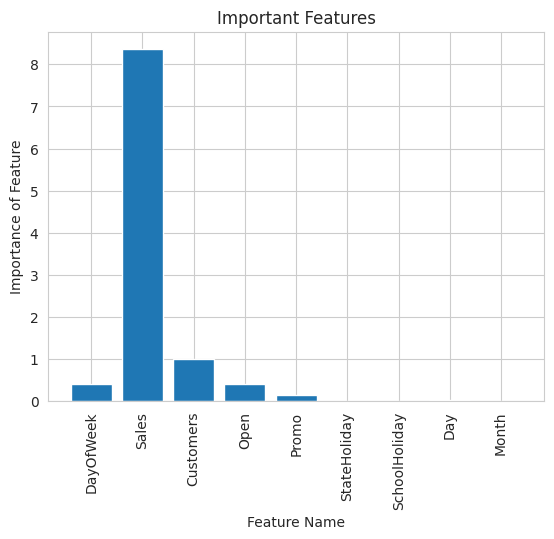

In [25]:
from sklearn.feature_selection import mutual_info_regression

mir = mutual_info_regression(X_numeric, y)
feature_names = X_numeric.columns.tolist()
plt.bar(feature_names, mir)
plt.xticks(rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Importance of Feature')
plt.title('Important Features')
plt.show()

In [26]:
X.head()

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month
0,5,555,1,1,0.0,1,31,7
1,5,625,1,1,0.0,1,31,7
2,5,821,1,1,0.0,1,31,7
3,5,1498,1,1,0.0,1,31,7
4,5,559,1,1,0.0,1,31,7


In [27]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=True)

In [29]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (788927, 8)
Shape of X_test: (197232, 8)
Shape of y_train: (788927,)
Shape of y_test: (197232,)


## Training the model with Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=1234)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1234)

## Model Evaluation

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {round(r2 * 100, 3)}%')

Mean Squared Error: 2185615.7898968565
Mean Absolute Error: 994.4681744056328
R-squared: 84.625%


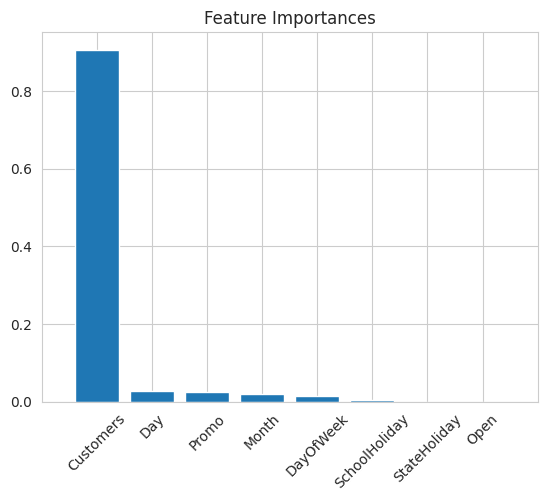

In [35]:
# Display important feature
feature_importances = model.feature_importances_
indices = feature_importances.argsort()[::-1]
num_features = X_train.shape[1]

# Display a limited number of features
plt.bar(range(num_features), feature_importances[indices[:num_features]], align="center")
plt.title("Feature Importances")
plt.xticks(range(num_features), X_train.columns[indices[:num_features]], rotation=45)
plt.xlim([-1, num_features])
plt.show()

## Submission for Kaggle  

In [36]:
submission = pd.DataFrame({'Id': range(1, len(y_pred) + 1), 'Sales': y_pred})
submission.to_csv('submission.csv', index=False)

In [37]:
!kaggle competitions submit -c rossmann-store-sales -f submission.csv -m "This submission contains predictions made using a machine learning model for the Kaggle competition. The model has been trained on a subset of the provided dataset and fine-tuned to make predictions on the test data. "

100% 3.87M/3.87M [00:00<00:00, 12.2MB/s]
Successfully submitted to Rossmann Store Sales

## Saving the model

In [38]:
import pickle

with open('model.pkl', 'wb') as f:
  pickle.dump(model, f)